In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path

try:
    from google.colab import drive
    drive.mount('/content/drive')
    workding_dir = "/content/drive/MyDrive/logical-reasoning/"
except ModuleNotFoundError:
    workding_dir = str(Path.cwd().parent)

In [4]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [5]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env.example


True

In [6]:
P1 = """你是一个逻辑游戏的主持人。游戏规则如下：

1. 参与者会得到一个谜题。
2. 参与者可以通过提问来获取线索，尝试解开谜题。
3. 对于每个问题，主持人将根据实际情况回答以下五个选项之一：是、不是、不重要、回答正确、问法错误。
4. 回答中不能添加任何其它信息，也不能省略选项中的任何一个字。例如，不可以把“不是”省略成“不”。
5. 参与者需要根据回答来推理，并最终找出谜题的正确答案。

请严格按照这些规则回答参与者提出的问题。

谜题: {}

实际情况: {}

参与者提出的问题: {}
"""

In [7]:
P2 = """你是一个情景猜谜游戏的主持人。游戏规则如下：

1. 参与者会得到一个谜面，谜面会描述一个简单又难以理解的事件。
2. 主持人知道谜底，谜底是谜面的答案。
3. 参与者可以询问任何封闭式问题来找寻事件的真相。
4. 对于每个问题，主持人将根据实际情况回答以下五个选项之一：是、不是、不重要、回答正确、问法错误。各回答的判断标准如下：
   - 若谜面和谜底能找到问题的答案，回答：是或者不是
   - 若谜面和谜底不能直接或者间接推断出问题的答案，回答：不重要
   - 若参与者提问不是一个封闭式问题或者问题难以理解，回答：问法错误
   - 若参与者提问基本还原了谜底真相，回答：回答正确
5. 回答中不能添加任何其它信息，也不能省略选项中的任何一个字。例如，不可以把“不是”省略成“不”。

请严格按照这些规则回答参与者提出的问题。

**谜面:** {}

**谜底:** {}

**参与者提出的问题:** {}
"""

In [9]:
import pandas as pd

df_p1 = pd.read_csv("results/mgtv-results_p1_full_metrics.csv")
df_p1

epoch                                           model  accuracy  precision  \
0      0                 internlm/internlm2_5-7b-chat-1m  0.759667   0.741854   
1      1   internlm/internlm2_5-7b-chat-1m_checkpoint-44  0.761667   0.810873   
2      2   internlm/internlm2_5-7b-chat-1m_checkpoint-88  0.741333   0.816182   
3      3  internlm/internlm2_5-7b-chat-1m_checkpoint-132  0.755000   0.809829   
4      4  internlm/internlm2_5-7b-chat-1m_checkpoint-176  0.719000   0.803307   

     recall        f1  
0  0.781014  0.758887  
1  0.761667  0.780018  
2  0.741333  0.769524  
3  0.755000  0.775657  
4  0.719000  0.750319

In [10]:
df_p2 = pd.read_csv("results/mgtv-results_p2_full_metrics.csv")
df_p2

epoch                                           model  accuracy  precision  \
0      0                 internlm/internlm2_5-7b-chat-1m  0.766000   0.747969   
1      1   internlm/internlm2_5-7b-chat-1m_checkpoint-88  0.796333   0.808232   
2      2  internlm/internlm2_5-7b-chat-1m_checkpoint-176  0.781333   0.804716   
3      3  internlm/internlm2_5-7b-chat-1m_checkpoint-264  0.759000   0.805502   
4      4  internlm/internlm2_5-7b-chat-1m_checkpoint-352  0.730333   0.790676   
5      5  internlm/internlm2_5-7b-chat-1m_checkpoint-440  0.730333   0.790420   
6      6  internlm/internlm2_5-7b-chat-1m_checkpoint-528  0.716000   0.789892   

     recall        f1  
0  0.787526  0.764922  
1  0.796333  0.798160  
2  0.781333  0.788581  
3  0.759000  0.777237  
4  0.730333  0.753716  
5  0.730333  0.753750  
6  0.716000  0.744833

In [11]:
df_p2 = df_p2[:len(df_p1)]
df_p2

epoch                                           model  accuracy  precision  \
0      0                 internlm/internlm2_5-7b-chat-1m  0.766000   0.747969   
1      1   internlm/internlm2_5-7b-chat-1m_checkpoint-88  0.796333   0.808232   
2      2  internlm/internlm2_5-7b-chat-1m_checkpoint-176  0.781333   0.804716   
3      3  internlm/internlm2_5-7b-chat-1m_checkpoint-264  0.759000   0.805502   
4      4  internlm/internlm2_5-7b-chat-1m_checkpoint-352  0.730333   0.790676   

     recall        f1  
0  0.787526  0.764922  
1  0.796333  0.798160  
2  0.781333  0.788581  
3  0.759000  0.777237  
4  0.730333  0.753716

Best P1 accuracy:
0.7616666666666667
Best P2 accuracy:
0.7963333333333333


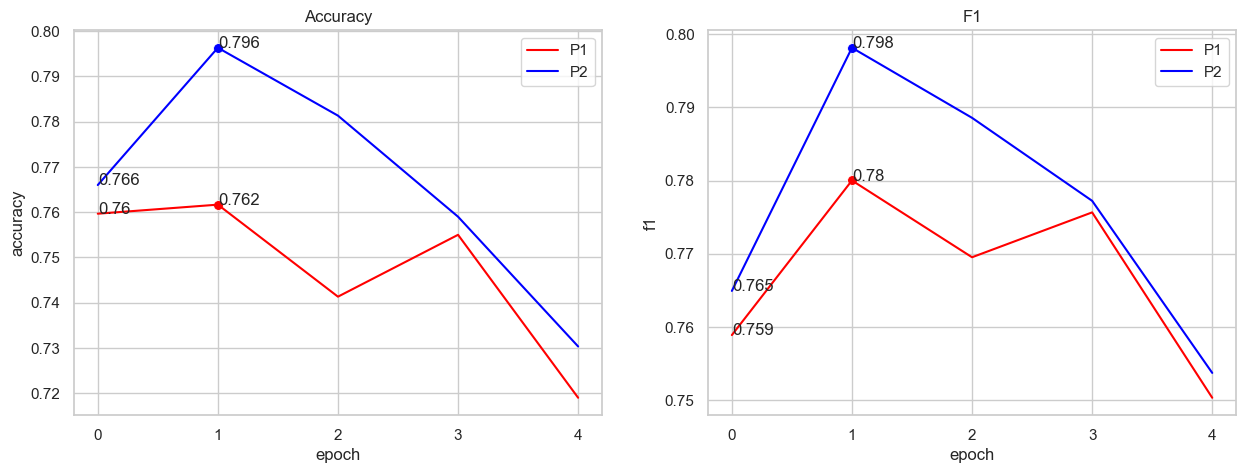

In [32]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_theme(style="whitegrid")

# print the best results
best_p1 = df_p1[df_p1["accuracy"] == df_p1["accuracy"].max()]
best_p2 = df_p2[df_p2["accuracy"] == df_p2["accuracy"].max()]

print("Best P1 accuracy:")
print(best_p1["accuracy"].values[0])
print("Best P2 accuracy:")
print(best_p2["accuracy"].values[0])

# plot the best results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x="epoch", y="accuracy", data=df_p1, ax=ax[0], color="red", label="P1")
sns.lineplot(x="epoch", y="accuracy", data=df_p2, ax=ax[0], color="blue", label="P2")
sns.scatterplot(x="epoch", y="accuracy", data=best_p1, ax=ax[0], color="red", s=50)
sns.scatterplot(x="epoch", y="accuracy", data=best_p2, ax=ax[0], color="blue", s=50)

sns.lineplot(x="epoch", y="f1", data=df_p1, ax=ax[1], color="red", label="P1")
sns.lineplot(x="epoch", y="f1", data=df_p2, ax=ax[1], color="blue", label="P2")
sns.scatterplot(x="epoch", y="f1", data=best_p1, ax=ax[1], color="red", s=50)
sns.scatterplot(x="epoch", y="f1", data=best_p2, ax=ax[1], color="blue", s=50)

# plot values on the best results
ax[0].text(best_p1["epoch"].values[0], best_p1["accuracy"].values[0], round(best_p1["accuracy"].values[0], 3), ha='left')
ax[0].text(best_p2["epoch"].values[0], best_p2["accuracy"].values[0], round(best_p2["accuracy"].values[0], 3), ha='left')
ax[1].text(best_p1["epoch"].values[0], best_p1["f1"].values[0], round(best_p1["f1"].values[0], 3), ha='left')
ax[1].text(best_p2["epoch"].values[0], best_p2["f1"].values[0], round(best_p2["f1"].values[0], 3), ha='left')

# plot values on epoch 0
ax[0].text(0, df_p1["accuracy"].values[0], round(df_p1["accuracy"].values[0], 3), ha='left')
ax[0].text(0, df_p2["accuracy"].values[0], round(df_p2["accuracy"].values[0], 3), ha='left')
ax[1].text(0, df_p1["f1"].values[0], round(df_p1["f1"].values[0], 3), ha='left')
ax[1].text(0, df_p2["f1"].values[0], round(df_p2["f1"].values[0], 3), ha='left')

ax[0].set_title("Accuracy")
ax[1].set_title("F1")

# After plotting your data and before plt.show(), add these lines
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()